In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder

In [522]:
df_train = pd.read_csv('train.csv')

In [523]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [524]:
y = df_train['Survived']
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [525]:
df_train.drop(['PassengerId', 'Survived', 'Name', 'Sex','Age', 'Ticket', 'Cabin', 'Embarked'], axis=1,inplace=True)

In [526]:
X = df_train
X.head(5)

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


In [527]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [528]:
model.fit(X_train, y_train)

LogisticRegression()

In [529]:
predictions = model.predict_proba(X_test)

In [530]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

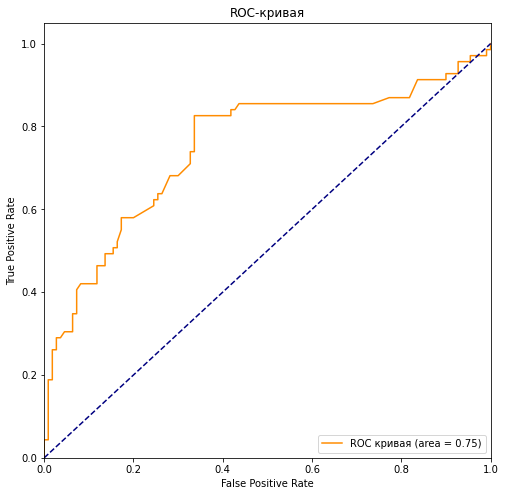

In [531]:
roc_auc = auc(fpr, tpr)
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [625]:
df_train2 = pd.read_csv('train.csv')

In [626]:
df_train2.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S


Отберем для модели подходящие для прогноза выживания характеристики. На мой взгляд выживание не зависит от :   
PassengerId  - это просто порядковый номер
Name - имени пассажира
SibSp - кол-ва братьев и систер 
Parch - кол-ва родителей и детей
Ticket - номера билета 
Embarked - порта отправки 

In [627]:
df_train2 = df_train2[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Survived']]
df_train2.sample(3)

,Pclass,Sex,Age,Fare,Cabin,Survived
659,1,male,58.0,113.275,D48,0
181,2,male,NaN,15.050,NaN,0
672,2,male,70.0,10.500,NaN,0


Посмотрим какие данные сожержат пропуски и что можно с ними сделать 

In [628]:
mising_value_count = df_train2.isnull().sum()
mising_value_count

Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Survived      0
dtype: int64

Посчитаем процент потери данных при удалении пропусков 

In [629]:
total_cells = np.product(df_train2.shape)
total_missing = mising_value_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

16.161616161616163


In [630]:
df_train2.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [631]:
df_train2['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

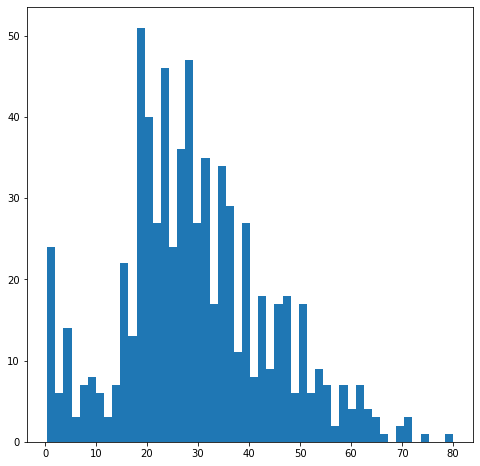

In [632]:
plt.hist(df_train2['Age'], bins=50)
plt.show()

Заменим пропуски в столбце Age медианой 

In [633]:
df_train2.loc[:, 'Age'].fillna(df_train2['Age'].median(), inplace=True)
df_train2['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [634]:
df_train2['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [635]:
df_train2['Cabin'].mode()[0]

'B96 B98'

In [636]:
df_train2.loc[:, 'Cabin'].fillna(df_train2['Cabin'].mode()[0], inplace=True)
df_train2['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [637]:
mising_value_count = df_train2.isnull().sum()
mising_value_count

Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
Survived    0
dtype: int64

Закодируем полученные данные с помощью LabelEncoder

In [638]:
le = LabelEncoder()

In [639]:
le.fit(df_train2['Cabin'])
df_train2['Cabin_Le'] = le.transform(df_train2['Cabin'])
df_train2.drop(['Cabin'], axis=1, inplace=True)
df_train2.sample(3)

,Pclass,Sex,Age,Fare,Survived,Cabin_Le
586,2,male,47.0,15.0000,0,47
882,3,female,22.0,10.5167,0,47
79,3,female,30.0,12.4750,1,47


In [640]:
le.fit(df_train2['Sex'])
df_train2['Sex_Le'] = le.transform(df_train2['Sex'])
df_train2.drop(['Sex'], axis=1, inplace=True)
df_train2.sample(3)

,Pclass,Age,Fare,Survived,Cabin_Le,Sex_Le
678,3,43.0,46.9000,0,47,0
350,3,23.0,9.2250,0,47,1
786,3,18.0,7.4958,1,47,0


Проверим выбросы в столбце Age

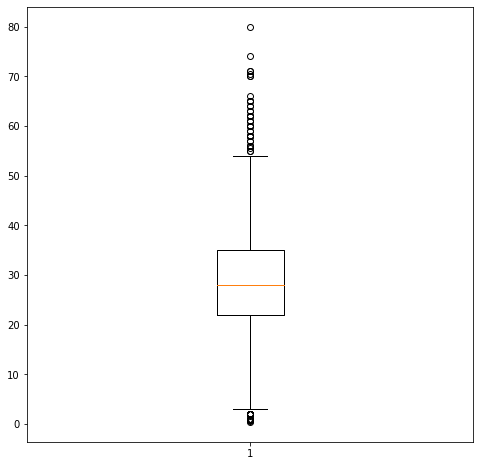

In [641]:
plt.boxplot(df_train2['Age'])
plt.show()

In [642]:
q1 = df_train2['Age'].quantile(0.25)
q3 = df_train2['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
print(lower_bound)
upper_bound = q3 + (1.5 * iqr)
print(upper_bound)
# remove_outliers = df_train2[df_train2['Age'].between(lower_bound, upper_bound, inclusive=True)].sort_values('Age')
# remove_outliers.sample(5)

2.5
54.5


Статистически значения столбца возраст вне диапазона 2,5 - 54 года, являются выбросами. На в данном датасете я не считаю нужным их удалять . Т.к. все значения возраста (от 0.42 до 80) однозначно могут быть реальными и их удаление повлияет наспособность модели приавильно ориентироваться в подобных реальных данных. 

Построим графики по нашим данным

График зависимости выживания от класса билета

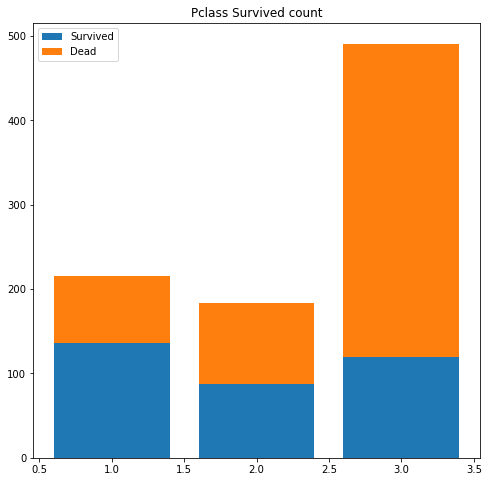

In [643]:
data = df_train2[['Pclass','Survived']]
y_survived=data[data.Survived==1].groupby('Pclass')['Survived'].count()
y_dead=data[data.Survived==0].groupby('Pclass')['Survived'].count()
pos=range(1,4)
plt.bar(pos,y_survived,label='Survived')
plt.bar(pos,y_dead,bottom=y_survived,label='Dead')
plt.legend()
plt.title('Pclass Survived count')
plt.show()


График зависимости выживания от пола 

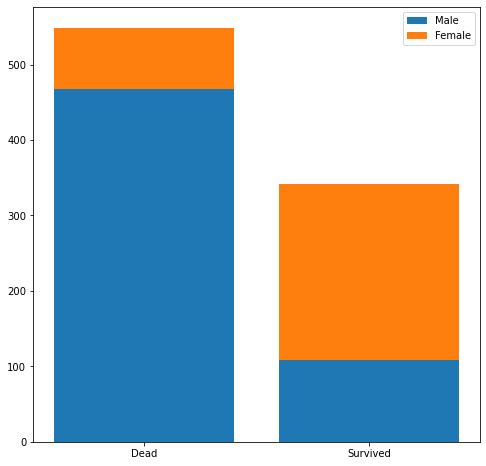

In [644]:
data=df_train2[['Sex_Le','Survived']]
y_male=[0,0]
y_female=[0,0]
for i in range(len(data.Sex_Le)):
    if data.Sex_Le[i]==1:
        if data.Survived[i]==0:
            y_male[0]+=1
        else:
            y_male[1]+=1
    else:
        if data.Survived[i]==0:
            y_female[0]+=1
        else:
            y_female[1]+=1
x_number=range(1,3)
x_word=['Dead','Survived']
plt.bar(x_number,y_male,label='Male')
plt.bar(x_number,y_female,bottom=y_male,label='Female')
plt.legend()
plt.xticks(x_number,x_word)
plt.show()

Создадим модель по новым полученным данным

In [645]:
y2 = df_train2['Survived']
y2.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [646]:
df_train2.drop(['Survived'], axis=1, inplace=True)
X2 = df_train2
X2.head(3)

,Pclass,Age,Fare,Cabin_Le,Sex_Le
0,3,22.0,7.2500,47,1
1,1,38.0,71.2833,81,0
2,3,26.0,7.9250,47,0


In [647]:
model2 = LogisticRegression()
X2_train, X2_test, y2_train, y2_test  = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [649]:
model2.fit(X2_train, y2_train)

LogisticRegression()

In [650]:
prediction2 = model2.predict_proba(X2_test)

In [651]:
fpr2, tpr2, thres2 = roc_curve( y2_test, prediction2[:, 1])

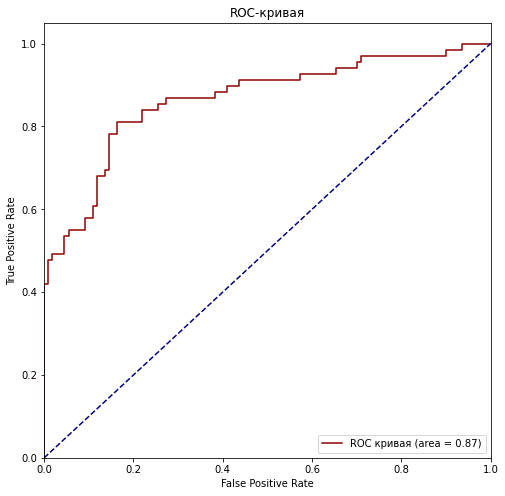

In [652]:
roc_auc2 = auc(fpr2, tpr2)
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(fpr2, tpr2, color='darkred',
         label='ROC кривая (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

### Вывод:   

а) Были отобраны признаки , влияющие по нашему мнению на исход.В них мы нашли и заменили пропущенные данные . Категориальные признаки, мы преобразовали в числовые.   
b) При сравнении признаков 2х полученных моделей, очевидно что признаков в первой модели не достаточно для построения хорошей модели. Простое использование только числовых переменных не может определить значимые признаки.   
с) Безусловно, для построения модели , необходима предварительная работа с данными. Очистка и преобразование данных позволяет добиться более правильного "понимания" моделью данных и как результат более качественного предсказания. 

